# Problem

Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir. Modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.

# Veri Seti Özellikleri

Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. ABD'deki Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde 21 yaş ve üzerinde olan <b>Pima Indian kadınları</b> üzerinde yapılan diyabet araştırması için kullanılan verilerdir.

Hedef değişken <b>"Outcome"</b> olarak belirtilmiş olup; <b>1</b> diyabet test sonucunun <b>pozitif</b> oluşunu, <b>0</b> ise <b>negatif</b> oluşunu belirtmektedir.

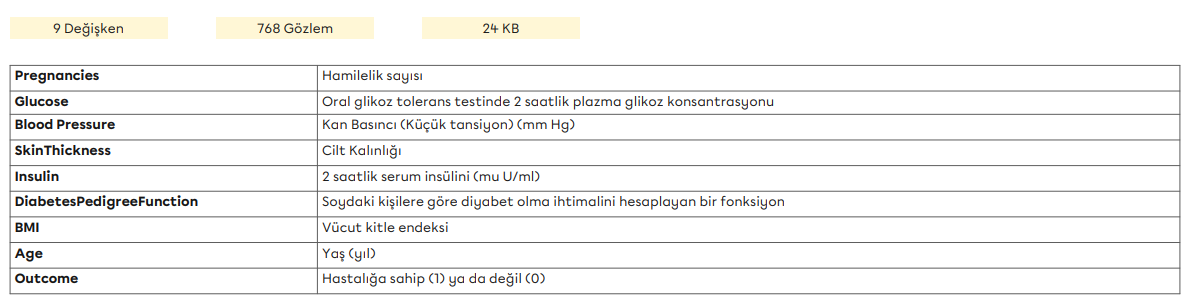

## Görev 1: Keşifçi Veri Analizi

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: '%.3f' % x)

In [44]:
df = pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [45]:
df.columns = [col.upper() for col in df.columns]
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [46]:
df.isnull().sum()

PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
GLUCOSE,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BLOODPRESSURE,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SKINTHICKNESS,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
INSULIN,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DIABETESPEDIGREEFUNCTION,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
AGE,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
OUTCOME,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREGNANCIES               768 non-null    int64  
 1   GLUCOSE                   768 non-null    int64  
 2   BLOODPRESSURE             768 non-null    int64  
 3   SKINTHICKNESS             768 non-null    int64  
 4   INSULIN                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DIABETESPEDIGREEFUNCTION  768 non-null    float64
 7   AGE                       768 non-null    int64  
 8   OUTCOME                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        Değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        Numerik fakat kategorik olan değişkenler için sınıf eşik değeri.
    car_th: int, float
        Kategorik fakat kardinal değişkenler için sınıf eşik değeri.

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi.
    num_cols: list
        Numerik değişken listesi.
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi.

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat, cat_cols'un içerisinde.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object", "category", "bool"]]

    num_but_cats = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"] and
                    dataframe[col].nunique() < cat_th]

    cat_but_cars = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object", "category"] and
                    dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cats

    cat_cols = [col for col in cat_cols if col not in cat_but_cars]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in num_but_cats]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_cars)}")
    print(f"num_but_cat: {len(num_but_cats)}")

    return cat_cols, num_cols, cat_but_cars

In [50]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [51]:
def numSummary(dataframe, numericalCol, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
    print(dataframe[numericalCol].describe(quantiles).T)
    
    if plot:
        dataframe[numericalCol].hist()
        plt.xlabel(numericalCol)
        plt.title(numericalCol)
        plt.show(block=True)

In [52]:
def catSummary(dataframe, colName, plot=False):
    print(pd.DataFrame({colName: dataframe[colName].value_counts(),
                        "Ratio": 100 * dataframe[colName].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[colName], data=dataframe)
        plt.show(block=True)

In [53]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
100%     17.000
max      17.000
Name: PREGNANCIES, dtype: float64


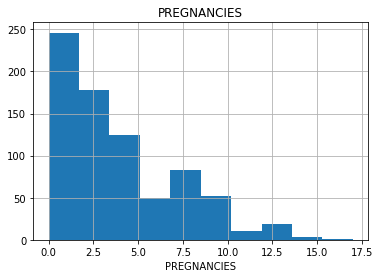

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
100%    199.000
max     199.000
Name: GLUCOSE, dtype: float64


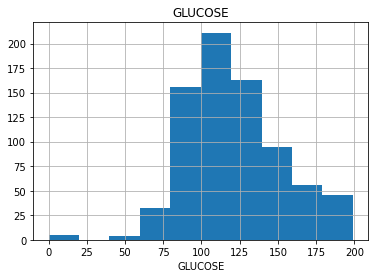

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
100%    122.000
max     122.000
Name: BLOODPRESSURE, dtype: float64


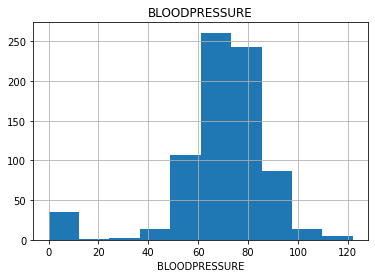

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
100%     99.000
max      99.000
Name: SKINTHICKNESS, dtype: float64


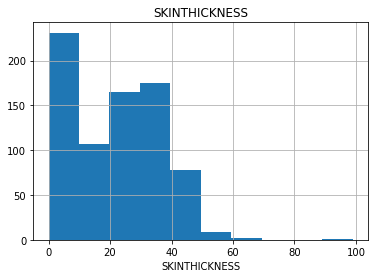

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
100%    846.000
max     846.000
Name: INSULIN, dtype: float64


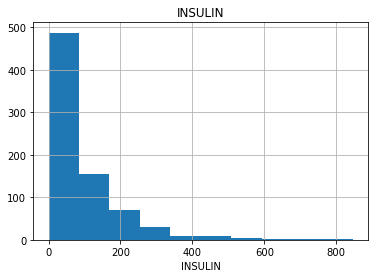

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
100%     67.100
max      67.100
Name: BMI, dtype: float64


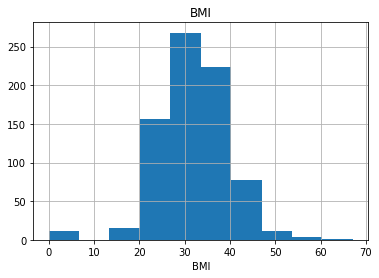

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
100%      2.420
max       2.420
Name: DIABETESPEDIGREEFUNCTION, dtype: float64


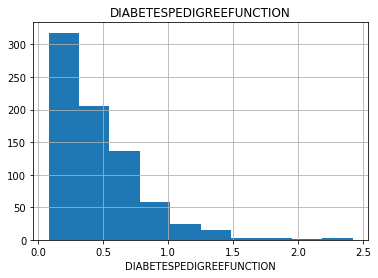

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
100%     81.000
max      81.000
Name: AGE, dtype: float64


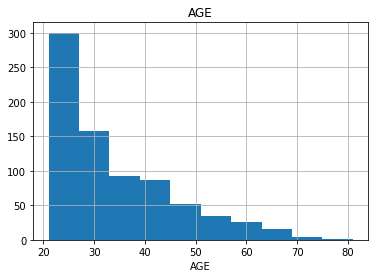

In [54]:
for col in num_cols:
    numSummary(df, col, plot=True)

   OUTCOME  Ratio
0      500 65.104
1      268 34.896
##########################################


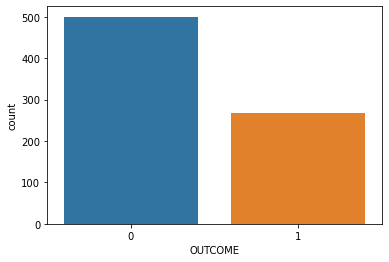

In [55]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        print(col)
    else:
        catSummary(df, col, True)

In [56]:
def cat_summary_w_target(dataframe, num_col, target):
    print(dataframe.groupby(target).agg({num_col: "mean"}), end="\n\n\n")

In [57]:
for col in num_cols:
    cat_summary_w_target(df, col, "OUTCOME")

         PREGNANCIES
OUTCOME             
0              3.298
1              4.866


         GLUCOSE
OUTCOME         
0        109.980
1        141.257


         BLOODPRESSURE
OUTCOME               
0               68.184
1               70.825


         SKINTHICKNESS
OUTCOME               
0               19.664
1               22.164


         INSULIN
OUTCOME         
0         68.792
1        100.336


           BMI
OUTCOME       
0       30.304
1       35.143


         DIABETESPEDIGREEFUNCTION
OUTCOME                          
0                           0.430
1                           0.550


           AGE
OUTCOME       
0       31.190
1       37.067




In [58]:
def catch_outliers(dataframe, num_col, q1=0.25, q3=0.75):
    quartile1 = dataframe[num_col].quantile(q1)
    quartile3 = dataframe[num_col].quantile(q3)
    iqr = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr

    # outliers = [dataframe[(dataframe[num_col] < low) | (dataframe[num_col] > up)]]
    return low_limit, up_limit

def check_outlier(dataframe, num_col):
    low_limit, up_limit = catch_outliers(dataframe, num_col)

    if dataframe[(dataframe[num_col] < low_limit) | (dataframe[num_col] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [59]:
for col in num_cols:
    print(col, check_outlier(df, col))

PREGNANCIES True
GLUCOSE True
BLOODPRESSURE True
SKINTHICKNESS True
INSULIN True
BMI True
DIABETESPEDIGREEFUNCTION True
AGE True


In [60]:
def missing_values_table(dataframe, na_name=False):
    # eksik veri bulunduran değişkenlerin seçilmesi
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    
    # değişkenlerdeki eksik değer miktarı
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    # değişkenlerdeki eksik değer oranı
    ratio = (dataframe[na_columns].isnull().sum() / len(dataframe) * 100).sort_values(ascending=False)
    
    # yukardaki hesapladığımız miktar ve oran bilgilerini içeren bir df oluşturulması
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    
    print(missing_df, end='\n')
    
    if na_name:
        return na_columns

In [61]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [62]:
corr = df[num_cols].corr()
corr

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
PREGNANCIES,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544
GLUCOSE,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264
BLOODPRESSURE,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240
SKINTHICKNESS,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114
INSULIN,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036
DIABETESPEDIGREEFUNCTION,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034
AGE,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000
